In [ ]:
!pip install transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

startup = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/B2Bmatching/startup_list.csv', usecols = ['startup_id', 'items', 'invest_attraction_stage', 'startup_program_history'], encoding='cp949')
print("Number of Startup Profile=", len(startup))

bizmeeting = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/B2Bmatching/Biz_meeting.csv', usecols = ['startup_id', 'buyers_id','satisfaction_rating', 'labeling'], encoding='cp949')
print("Number of Biz_meeting=", len(bizmeeting))

tempJoinSet = pd.merge(bizmeeting, startup, 'left', on="startup_id")
print("Number of startup+bizmeeting Joined Dataset=", len(tempJoinSet))

buyers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/B2Bmatching/buyers_list.csv', usecols = ['buyers_id', 'country', 'items', 'order_potential'],  encoding='cp949')
print("Number of Buyers Profile=", len(buyers))

joinSet = pd.merge(tempJoinSet, buyers, 'left', on="buyers_id")
print("Number of startup+buyers+bizmeeting Joined Dataset=", len(joinSet))

Number of Startup Profile= 2218
Number of Biz_meeting= 9529
Number of startup+bizmeeting Joined Dataset= 9529
Number of Buyers Profile= 1832
Number of startup+buyers+bizmeeting Joined Dataset= 9529


In [ ]:
joinSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9529 entries, 0 to 9528
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   startup_id               9529 non-null   object 
 1   buyers_id                9529 non-null   object 
 2   satisfaction_rating      9518 non-null   float64
 3   labeling                 9529 non-null   int64  
 4   items_x                  5244 non-null   object 
 5   invest_attraction_stage  5244 non-null   object 
 6   startup_program_history  5244 non-null   object 
 7   country                  5128 non-null   object 
 8   items_y                  5128 non-null   object 
 9   order_potential          5128 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 818.9+ KB


In [ ]:
joinSet = joinSet.rename({'items_x' : 'startup_items', 'items_y' : 'buyers_items'}, axis = 1)

joinSet.columns

Index(['startup_id', 'buyers_id', 'satisfaction_rating', 'labeling',
       'startup_items', 'invest_attraction_stage', 'startup_program_history',
       'country', 'buyers_items', 'order_potential'],
      dtype='object')

In [ ]:
joinSet

,startup_id,buyers_id,satisfaction_rating,labeling,startup_items,invest_attraction_stage,startup_program_history,country,buyers_items,order_potential
0,\n㈜바이온텍판매\n,"OSG VIET NAM CO., LTD",0.0,0,Water Ioniser \nPuryfying Machinery,seed,delegation,미국,툴홀더,0
1,\n(주)제이에스테크,TusStarVC,0.0,0,식품,seed,delegation,NaN,NaN,NaN
2,라윤코리아,MOORE AUSTRALIA,0.0,0,PDO Threads,seed,delegation,호주,it is interested in investing for wireless cha...,0
3,(주)대동인덱스,"[Smart Farm]Noncommercial JSC ""National Agrari...",0.0,0,Pneumatic components,seed,delegation,NaN,NaN,NaN
4,(주)더밥,RP DENTAL,0.0,0,식품,seed,delegation,미국,dental x-ray equipment,0
...,...,...,...,...,...,...,...,...,...,...
9524,휴토피아,DELTACMA PVT LTD / KINDLIFE,4.0,1,화장품,seed,delegation,미국,화장품,0
9525,휴토피아,Magistral Domain,4.0,1,화장품,seed,delegation,미국,화장품,0
9526,히든메이커스,마쿠아케,5.0,1,NaN,NaN,NaN,NaN,NaN,NaN
9527,힐세리온,H. DAM KÆRGAARD,4.0,1,의료기기,seed,delegation,미국,의료기기,0


In [ ]:
# 스타트업 프로파일 벡터 만들기 : 제품 및 서비스 설명, 회사 규모, 수출/투자 경력 등
joinSet['startupProfile'] = joinSet['startup_id'].astype(str) + " " + joinSet['startup_items'].astype(str) + " " + joinSet['invest_attraction_stage'].astype(str) + " " + joinSet['startup_program_history'].astype(str) + " " + joinSet['satisfaction_rating'].astype(str)

# 바이어 프로파일 벡터 만들기 : 관심 품목 및 서비스, 수입 이력 등
joinSet['buyersProfile'] = joinSet['buyers_id'].astype(str) + " " + joinSet['country'].astype(str) + " " + joinSet['buyers_items'].astype(str) + " " + joinSet['order_potential'].astype(str) + " " + joinSet['satisfaction_rating'].astype(str)

joinSet.head(2)

,startup_id,buyers_id,satisfaction_rating,labeling,startup_items,invest_attraction_stage,startup_program_history,country,buyers_items,order_potential,startupProfile,buyersProfile
0,\n㈜바이온텍판매\n,"OSG VIET NAM CO., LTD",0.0,0,Water Ioniser \nPuryfying Machinery,seed,delegation,미국,툴홀더,0,\n㈜바이온텍판매\n Water Ioniser \nPuryfying Machine...,"OSG VIET NAM CO., LTD 미국 툴홀더 0 0.0"
1,\n(주)제이에스테크,TusStarVC,0.0,0,식품,seed,delegation,NaN,NaN,NaN,\n(주)제이에스테크 식품 seed delegation 0.0,TusStarVC nan nan nan 0.0


In [ ]:
train = joinSet[['startup_id', 'buyers_id', 'labeling','startupProfile','buyersProfile']]
trainy = np.array(train['labeling'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, trainy, test_size=0.2, random_state=7000)
x_train.reset_index(inplace=True)
print(x_train.shape, y_train.shape)
x_test.reset_index(inplace=True)
print(x_test.shape, y_test.shape)
x_test.head()

(7623, 6) (7623,)
(1906, 6) (1906,)


,index,startup_id,buyers_id,labeling,startupProfile,buyersProfile
0,1202,CELLBIG,AXA,0,CELLBIG nan nan nan 0.0,AXA nan nan nan 0.0
1,1300,DAESUNG,Asgard Capital,0,DAESUNG IT seed Innogate 0.0,Asgard Capital nan nan nan 0.0
2,8129,스완슨앤리,Amron Industries Pty Ltd,1,스완슨앤리 자동차 배관용 파이프 seed delegation 4.0,Amron Industries Pty Ltd 미국 자동차 배관용 파이프 0 4.0
3,3227,비이제이실크,Boeing,0,비이제이실크 실크 스카프 seed delegation 0.0,Boeing 미국 국내업체는 고장 부위가 예상가능한 유지 솔루션을 소개함. \n기존...
4,402,(주)살린,Grow IE,0,(주)살린 nan nan nan 0.0,Grow IE 미국 derma soothing powder 0 0.0


In [ ]:
!pip install sentencepiece
!pip install "jax<=0.3.16" "jaxlib<=0.3.16"

In [ ]:
import tensorflow as tf
import numpy as np
from transformers import BertTokenizer
from tqdm import tqdm
import os

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def convert_data(data_df):
    global tokenizer
    indices, segments, masks = [], [], []

    for i in tqdm(range(len(data_df))):
        # que : startupProfile을 버트 인풋으로 들어갈 수 있게 토큰화 한 변수, tokenizer.encode를 사용하면
        # 토큰화 된 리스트와, 세그먼트가 같이 나오는데 일단 토큰화 된 리스트만 사용

        # doc : buyersProfile을 버트 인풋으로 들어갈 수 있게 토근화 한 변수
        que = tokenizer.encode(data_df[STARTUP_COLUMN][i])
        doc = tokenizer.encode(data_df[BUYERS_COLUMN][i])

        # 토큰화된 buyersProfile의 맨 앞에 있는 [CLS]에 해당하는 101을 삭제
        doc.pop(0)

        # que_len, doc_len : buyersProfile의 길이, buyersProfile의 길이
        que_len = len(que)
        doc_len = len(doc)

        # 만약 startupProfile의 길이가 100을 초과하면, 100으로 잘라줌

        if que_len > 100:
          que = que[:99]
          # 질문의 끝이 [SEP]이 되도록, [SEP]에 해당하는 102 추가
          que.append(102)

        # 버트 인풋으로 들어가는 토큰화된 리스트가 최대 길이인 384가 넘지 않도록 만들어 줌
        # 384 미만이면 buyersProfile을 잘라줌
        if len(que+doc) > SEQ_LEN:
          while len(que+doc) != SEQ_LEN:
            doc.pop(-1)
          doc.pop(-1)
          #context의 끝이 [SEP]가 되도록 [SEP]에 해당하는 102를 추가해 줌
          doc.append(102)

        # 문장의 전후관계를 구분해주는 segment는, startupProfile은 0 이 되도록, buyersProfile는 1이 되도록, 나머지 부분인 패딩 부분은
        # 0이 되도록 만들어 줌

        ############################
        ###### Segment 예시 ########
        ############################

        # startupProfile, buyersProfile, padding
        # 00000000, 1111111, 0000000

        segment = [0]*len(que) + [1]*len(doc) + [0]*(SEQ_LEN-len(que)-len(doc))
        if len(que + doc) <= SEQ_LEN:
          mask = [1]*len(que+doc) + [0]*(SEQ_LEN-len(que+doc))
        else:
          mask = [1]*len(que+doc)
        # 만약 startupProfile과 buyersProfile을 합쳤을 때 그 길이가 384 미만이면
        # padding 값인 0을 채워주도록 함
        if len(que + doc) <= SEQ_LEN:
          while len(que+doc) != SEQ_LEN:
            doc.append(0)

        # ids : startupProfile과 buyersProfile을 합친 BERT의 실질적인 인풋
        ids = que + doc

        # BERT input으로 들어가는 ids, segments를 indices, segments에 각각 저장
        indices.append(ids)
        segments.append(segment)
        masks.append(mask)

    # indices, segments를 numpy array로 지정
    indices_x = np.array(indices)
    segments = np.array(segments)
    masks = np.array(masks)

    return [indices_x, masks, segments]

In [ ]:
# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[BUYERS_COLUMN] = data_df[BUYERS_COLUMN].astype(str)
    data_df[STARTUP_COLUMN] = data_df[STARTUP_COLUMN].astype(str)
    data_x = convert_data(data_df)

    return data_x

SEQ_LEN = 384
BUYERS_COLUMN = 'buyersProfile'
STARTUP_COLUMN = 'startupProfile'

train_x = load_data(x_train)
test_x = load_data(x_test)
train_y = y_train
test_y = y_test
train_x[0:3] # [indices_x, masks, segments]

100%|██████████| 1906/1906 [00:04<00:00, 470.23it/s]


[array([[  101,   113,  9689, ...,     0,     0,     0],
        [  101, 39774, 11403, ...,     0,     0,     0],
        [  101, 18082, 10112, ...,     0,     0,     0],
        ...,
        [  101,  9559, 10739, ...,     0,     0,     0],
        [  101,  9454, 16605, ...,     0,     0,     0],
        [  101,  9689, 21155, ...,     0,     0,     0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [ ]:
!pip install tensorflow_addons

In [ ]:
# Rectified Adam 옵티마이저 사용
import tensorflow_addons as tfa
opt = tfa.optimizers.RectifiedAdam(lr=1.0e-5, weight_decay=0.0025)
from transformers import TFBertModel
SEQ_LEN = 384

def create_b2b_bert():
  # 버트 pretrained 모델 로드 (다국어모델)
  model = TFBertModel.from_pretrained('bert-base-multilingual-cased')
  # 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
  token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
  mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
  segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
  # 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
  bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

  bert_outputs = bert_outputs[1]
  b2b_first = tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(bert_outputs)
  b2b_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], b2b_first)

  b2b_model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])
  return b2b_model

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/optimizers/rectified_adam.py:121: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# TPU 객체 지정

TPU = True

if TPU:
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
  tf.config.experimental_connect_to_cluster(resolver)
  tf.tpu.experimental.initialize_tpu_system(resolver)
else:
  pass

# TPU 실행 시
if TPU:
  strategy = tf.distribute.experimental.TPUStrategy(resolver)
# 함수를 strategy.scope로 묶어 줌
  with strategy.scope():
    b2b_model = create_b2b_bert()

  history = b2b_model.fit(train_x, train_y, epochs=10, shuffle=True, batch_size=128, validation_data=(test_x, test_y))

else:
  # GPU 모드로 훈련시킬 때
  b2b_model = create_b2b_bert()

  history = b2b_model.fit(train_x, train_y, epochs=10, shuffle=True, batch_size=128, validation_data=(test_x, test_y))

path = "/content/drive/MyDrive/Colab Notebooks/B2Bmatching"
b2b_model.save_weights(path+"/b2b_bert_ver2.h5")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/10
60/60 [==============================] - 214s 1s/step - loss: 0.6400 - accuracy: 0.7165 - val_loss: 0.4720 - val_accuracy: 0.9832
Epoch 2/10
60/60 [==============================] - 23s 387ms/step - loss: 0.3077 - accuracy: 0.9902 - val_loss: 0.0997 - val_accuracy: 0.9969
Epoch 3/10
60/60 [==============================] - 24s 401ms/step - loss: 0.0722 - accuracy: 0.9963 - val_loss: 0.0335 - val_accuracy: 0.9969
Epoch 4/10
60/60 [==============================] - 24s 393ms/step - loss: 0.0325 - accuracy: 0.9975 - val_loss: 0.0202 - val_accuracy: 0.9969
Epoch 5/10
60/60 [==============================] - 23s 387ms/step - loss: 0.0209 - accuracy: 0.9970 - val_loss: 0.0147 - val_accuracy: 0.9974
Epoch 6/10
60/60 [==============================] - 23s 389ms/step - loss: 0.0153 - accuracy: 0.9978 - val_loss: 0.0132 - val_accuracy: 0.9969
Epoch 7/10
60/60 [==============================] - 24s 394ms/step - loss: 0.0118 - accuracy: 0.9983 - val_loss: 0.0106 - val_accuracy: 0.9969
E

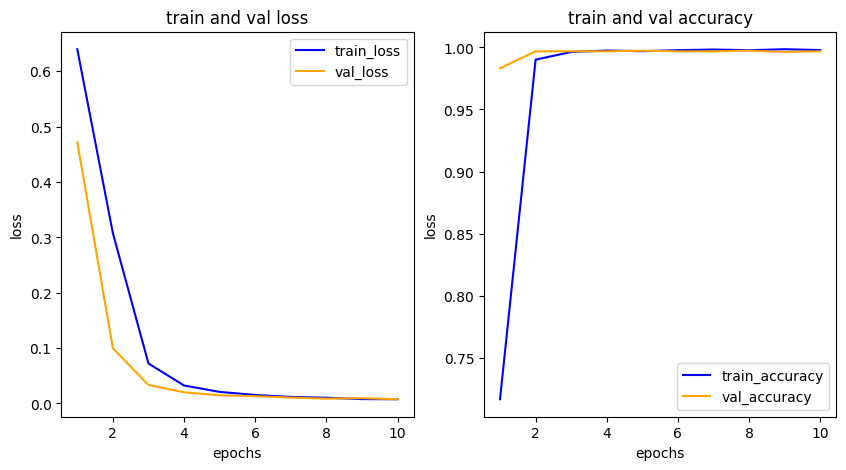

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_accuracy')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

성능평가

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error

path = "/content/drive/MyDrive/Colab Notebooks/B2Bmatching"

sentiment_model = create_sentiment_bert()
sentiment_model.load_weights(path + "/b2b_bert.h5")

In [ ]:
preds = sentiment_model.predict(test_x)
y_pred = (preds > 0.5).astype("int32")
y_true = test_y

print("accuracy_score: %.4f%% "%(accuracy_score(y_true, y_pred)))
print("precision_score: %.4f%%"%(precision_score(y_true, y_pred)))
print("recall_score: %.4f%%"%(recall_score(y_true, y_pred)))
print("f1_score: %.4f%%"%(f1_score(y_true, y_pred)))
print("roc_auc_score: %.4f%%"%(roc_auc_score(y_true, y_pred)))

60/60 [==============================] - 3940s 65s/step
accuracy_score: 0.9979% 
precision_score: 1.0000%
recall_score: 0.9956%
f1_score: 0.9978%
roc_auc_score: 0.9978%


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1007
           1       1.00      1.00      1.00       899

    accuracy                           1.00      1906
   macro avg       1.00      1.00      1.00      1906
weighted avg       1.00      1.00      1.00      1906



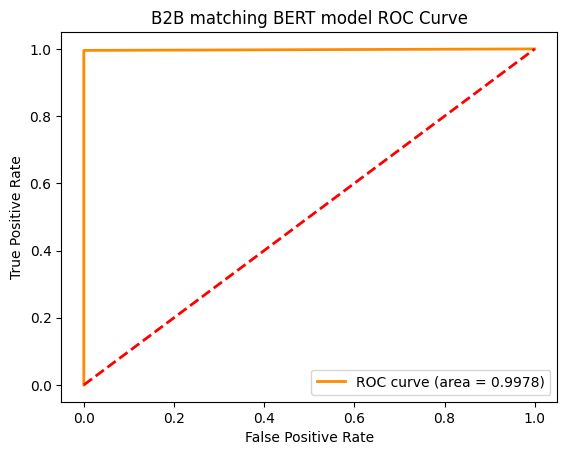

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_A, tpr_A, thr_A = roc_curve(y_true,y_pred)

auc_A = auc(fpr_A, tpr_A)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('B2B matching BERT model ROC Curve')

plt.plot(fpr_A, tpr_A, color='darkorange',
         lw=2, label='ROC curve (area = %0.4f)' % auc_A)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show()